In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (45000, 32, 32, 3)
Validation data shape: (5000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


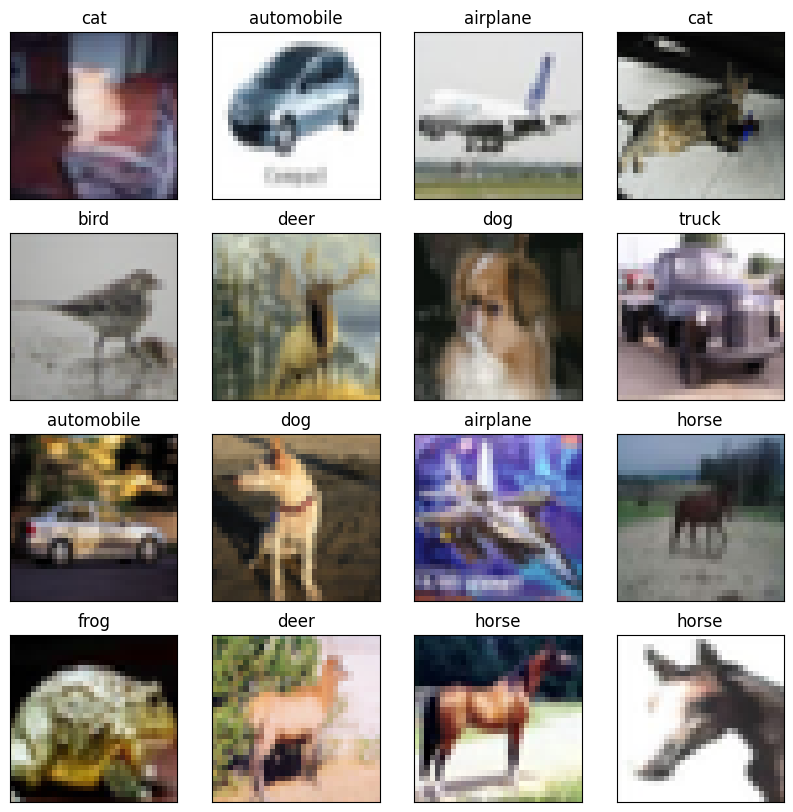

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split training into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Dataset shapes
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_valid.shape)
print("Test data shape:", X_test.shape)

# Visualize sample images with their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()


In [3]:
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [5]:
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [8]:
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733171804.855725     101 service.cc:145] XLA service 0x7ff0ac0025f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733171804.855796     101 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733171804.855803     101 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733171816.888385     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


704/704 - 52s - 74ms/step - accuracy: 0.3132 - loss: 1.9166 - val_accuracy: 0.4466 - val_loss: 1.4888 - learning_rate: 5.0000e-04
Epoch 2/50
704/704 - 27s - 38ms/step - accuracy: 0.4361 - loss: 1.5438 - val_accuracy: 0.4608 - val_loss: 1.6552 - learning_rate: 5.0000e-04
Epoch 3/50
704/704 - 27s - 38ms/step - accuracy: 0.5025 - loss: 1.3792 - val_accuracy: 0.5354 - val_loss: 1.2756 - learning_rate: 5.0000e-04
Epoch 4/50
704/704 - 26s - 37ms/step - accuracy: 0.5518 - loss: 1.2559 - val_accuracy: 0.5762 - val_loss: 1.2330 - learning_rate: 5.0000e-04
Epoch 5/50
704/704 - 26s - 36ms/step - accuracy: 0.5912 - loss: 1.1561 - val_accuracy: 0.6456 - val_loss: 1.0016 - learning_rate: 5.0000e-04
Epoch 6/50
704/704 - 26s - 36ms/step - accuracy: 0.6266 - loss: 1.0660 - val_accuracy: 0.6566 - val_loss: 0.9987 - learning_rate: 5.0000e-04
Epoch 7/50
704/704 - 27s - 38ms/step - accuracy: 0.6512 - loss: 1.0058 - val_accuracy: 0.6526 - val_loss: 0.9949 - learning_rate: 5.0000e-04
Epoch 8/50
704/704 - 27s

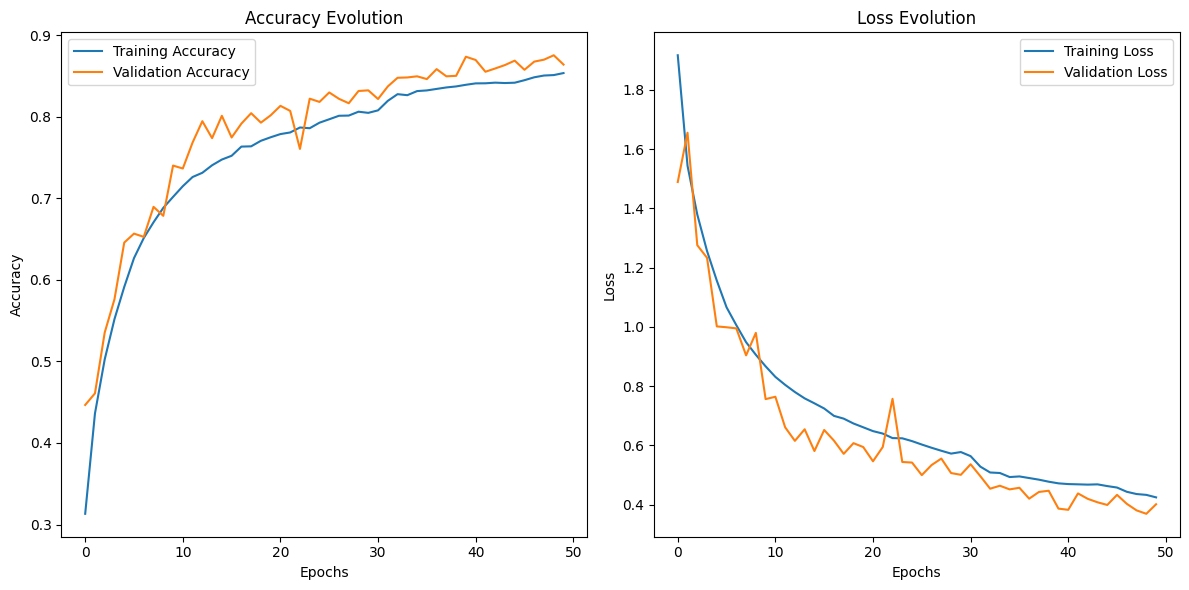

In [12]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs'), plt.ylabel('Accuracy'), plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs'), plt.ylabel('Loss'), plt.legend()

plt.tight_layout()
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.3998
Test Accuracy: 0.8662
Test Loss: 0.4033


In [14]:
from PIL import Image

# Load an external image
image_path = 'path_to_image.jpg'  # Replace with your image path
image = Image.open(image_path).resize((32, 32))
image_array = np.array(image).astype('float32') / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Predict class
predictions = model.predict(image_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/path_to_image.jpg'

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


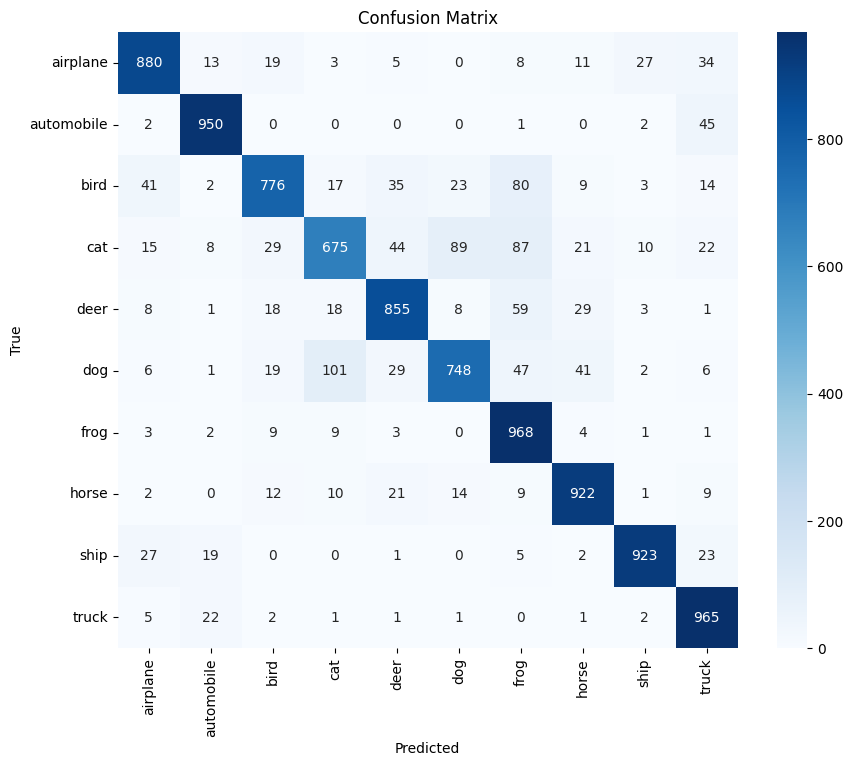

In [15]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
